# Analysis of Factors That Affect Grades

##### This portfolio has been created with the goal of understanding how certain factors affect students and their capacity to do well within exams. By the end, different methods of comparison will used to show the most and least influential factors which determine exam marks

In [17]:
#Your_Name = "Namah Kumar"
#Your_Student_ID = "47608811"
#Link to datset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [18]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

## PART 1: Cleaning and Ordering the Data Set

### Within this section of the portfolio we aim to accomplish the following

- 1.1: List the Total Number of Students
- 1.2: Drop Null/ Empty values from the data set
- 1.3: Convert Object data types to floats
- 1.4: Evalauate the correlation between Exam scores and other factors

In [21]:
#1.1: Reading 'StudentPerformanceFactors.csv and listing the length
SPF = pd.read_csv('StudentPerformanceFactors.csv')
print("Total Number of Students:", SPF.shape[0])

Total Number of Students: 6607


In [22]:
#1.2: Within this section I will be ensuring that the dataset is cleaned and usable for the following steps

# DataFrames after removing data
SPF.dropna(subset=['Teacher_Quality'], inplace=True)
SPF.dropna(subset=['Parental_Education_Level'], inplace=True)
SPF.dropna(subset=['Distance_from_Home'], inplace=True)


print('the number of values afterward:', SPF.shape[0])

the number of values afterward: 6378


In [23]:
#1.3: Checking to see which data values need to be converted
SPF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [24]:
#1.3: Now that the object classes have been found, they will now be converted to progress our analysis

#Convertinf Data Types
ord_enc= OrdinalEncoder()

#Data Types
#print(Object_SPF.dtypes)

#Convert Object Columns
#Object_SPF = SPF.select_dtypes(include=['object']).copy()

#Covert Object Columns into integer values
ord_enc=OrdinalEncoder(dtype=int)

SPF["Parental_Involvement"] = ord_enc.fit_transform(SPF[["Parental_Involvement"]])
SPF["Access_to_Resources"] = ord_enc.fit_transform(SPF[["Access_to_Resources"]])
SPF["Extracurricular_Activities"] = ord_enc.fit_transform(SPF[["Extracurricular_Activities"]])
SPF["Motivation_Level"] = ord_enc.fit_transform(SPF[["Motivation_Level"]])
SPF["Internet_Access"] = ord_enc.fit_transform(SPF[["Internet_Access"]])
SPF["Family_Income"] = ord_enc.fit_transform(SPF[["Family_Income"]])
SPF["Teacher_Quality"] = ord_enc.fit_transform(SPF[["Teacher_Quality"]])
SPF["School_Type"] = ord_enc.fit_transform(SPF[["School_Type"]])
SPF["Peer_Influence"] = ord_enc.fit_transform(SPF[["Peer_Influence"]])
SPF["Learning_Disabilities"] = ord_enc.fit_transform(SPF[["Learning_Disabilities"]])
SPF["Parental_Education_Level"] = ord_enc.fit_transform(SPF[["Parental_Education_Level"]])
SPF["Distance_from_Home"] = ord_enc.fit_transform(SPF[["Distance_from_Home"]])
SPF["Gender"] = ord_enc.fit_transform(SPF[["Gender"]])
#SPF.info()

#1.4: A comparison between Exam scores and other factors will now be made

#Evaluate Correlation between Exam marks and factors
correlation_matrix = SPF.corr()
Exam_correlation = correlation_matrix['Exam_Score']

print("Correlation between exam:")
print(Exam_correlation)

#Correlation in order from most to least
print("----------------------------------------------")
print("Correlation from most to least correlated")
print("""
Exam_Score:                   1.000000
Attendance:                   0.580259
Hours_Studied:                0.445104
Previous_Scores:              0.174283
Tutoring_Sessions:            0.156829
Peer_Influence:               0.099133
Distance_from_Home:           0.088083
Extracurricular_Activities:   0.063063
Internet_Access:              0.051124
Parental_Education_Level:     0.040816
Physical_Activity:            0.025148
Gender:                      -0.004932
School_Type:                 -0.010868
Sleep_Hours:                 -0.017171
Motivation_Level:            -0.017757
Family_Income:               -0.022651
Teacher_Quality:             -0.059247
Learning_Disabilities:       -0.083911
Access_to_Resources:         -0.088490
Parental_Involvement:        -0.094038""")

Correlation between exam:
Hours_Studied                 0.445104
Attendance                    0.580259
Parental_Involvement         -0.094038
Access_to_Resources          -0.088490
Extracurricular_Activities    0.063063
Sleep_Hours                  -0.017171
Previous_Scores               0.174283
Motivation_Level             -0.017757
Internet_Access               0.051124
Tutoring_Sessions             0.156829
Family_Income                -0.022651
Teacher_Quality              -0.059247
School_Type                  -0.010868
Peer_Influence                0.099133
Physical_Activity             0.025148
Learning_Disabilities        -0.083911
Parental_Education_Level      0.040816
Distance_from_Home            0.088083
Gender                       -0.004932
Exam_Score                    1.000000
Name: Exam_Score, dtype: float64
----------------------------------------------
Correlation from most to least correlated

Exam_Score:                   1.000000
Attendance:                   0.

# Part 2: Training and Testing Data

### With the cleaned and converted data, we will now leverage machine learning in order to  make predictions on exam scores 
### To effectively accomplish this, we must first:
- 2.1: Train the data on a split where 80% is trained and 20% is used for testing
- 2.2: Train a linear regression model on the most correlated and least correlated features to scrutinise their impact
- 2.3: Evaluate the models made

In [27]:
# 2.1: Training Model on a 80/20 Training-Testing Split for Efficiency
X=SPF.drop('Exam_Score', axis=1)
y=SPF['Exam_Score']

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X,y,test_size=0.2)
print("Result after training from 80% of the data:", X_train_80.shape, X_test_20.shape)



Result after training from 80% of the data: (5102, 19) (1276, 19)


In [28]:
# 2.2:Training Linear Regression Models with the two most correlated features

X_most1=SPF[['Attendance','Hours_Studied']]
y=SPF['Exam_Score']
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X,y,test_size=0.2)

model_a=LinearRegression()
model_a.fit(X_train_80,y_train_80)
predicted_a=model_a.predict(X_test_20)

In [29]:
#Training Linear Regression Models with the two least correlated features

X_least1=SPF[['Access_to_Resources','Parental_Involvement']]
y=SPF['Exam_Score']
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X,y,test_size=0.2)

model_b=LinearRegression()
model_b.fit(X_train_80,y_train_80)
predicted_b=model_b.predict(X_test_20)

In [30]:
# 2.3: Evaluating Model A

MSE_a= mean_squared_error(y_test_20, predicted_a)
RMSE_a=np.sqrt(MSE_a)
print("Mean Squared Error for Model A:", MSE_a)
print("Root Mean Squared Error for Model A:", RMSE_a)

Mean Squared Error for Model A: 26.351245787775834
Root Mean Squared Error for Model A: 5.1333464511735265


In [31]:
#Evaluating Model B

MSE_b= mean_squared_error(y_test_20, predicted_b)
RMSE_b=np.sqrt(MSE_b)
print("Mean Squared Error for Model A:", MSE_b)
print("Root Mean Squared Error for Model A:", RMSE_b)

Mean Squared Error for Model A: 5.977311420769687
Root Mean Squared Error for Model A: 2.4448540694220764


## Part 3: Visualisation and Comparison

#### We will now visualise and compare the most and least correlated data sets
-  3.1: Plot graphs against actual and predicted axises
-  3.2: Compare both features against each other

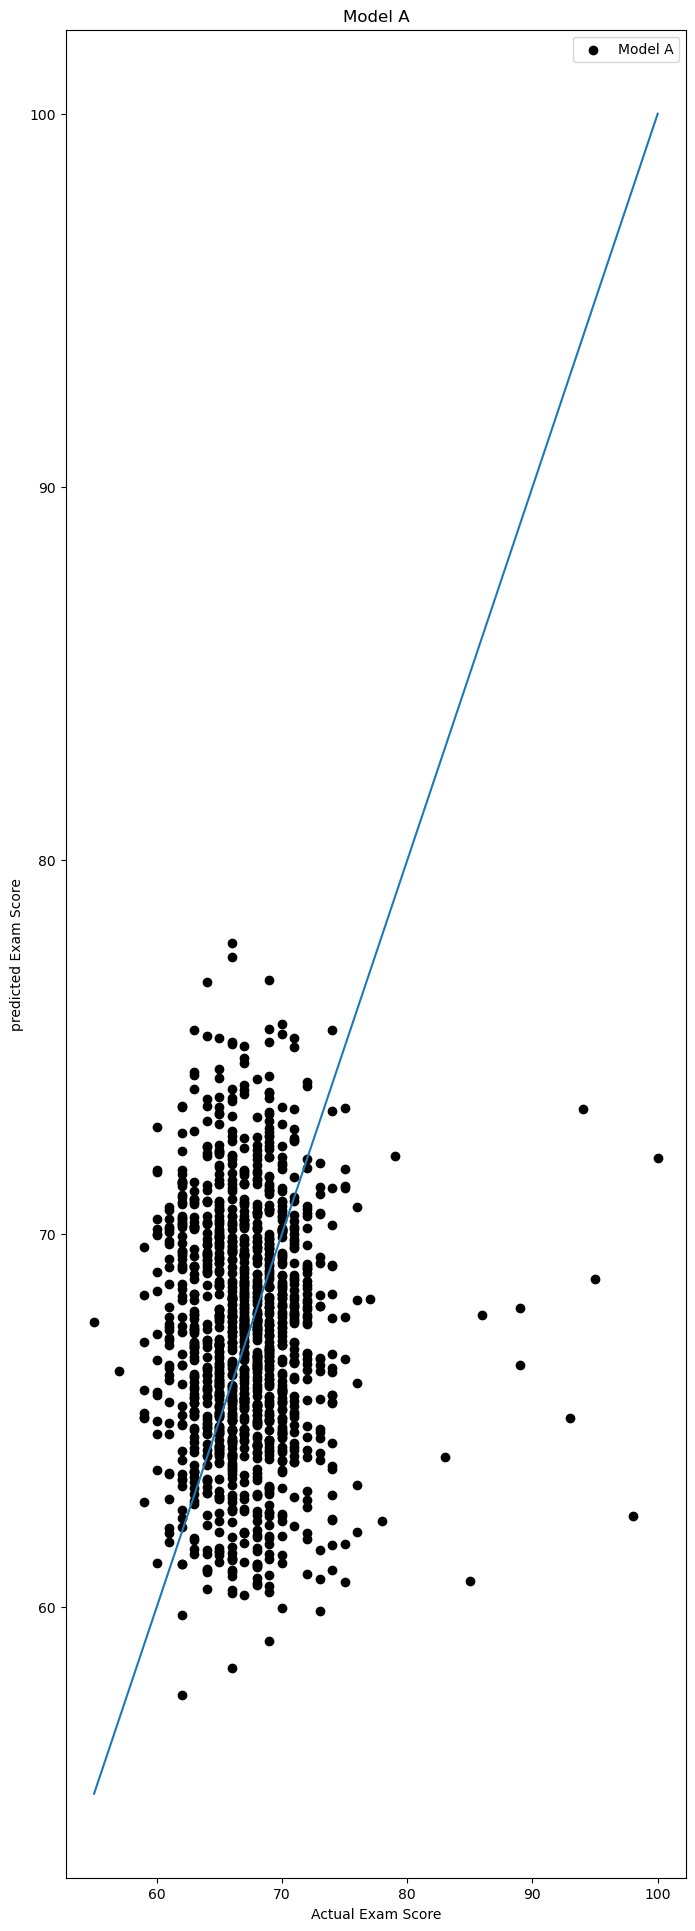

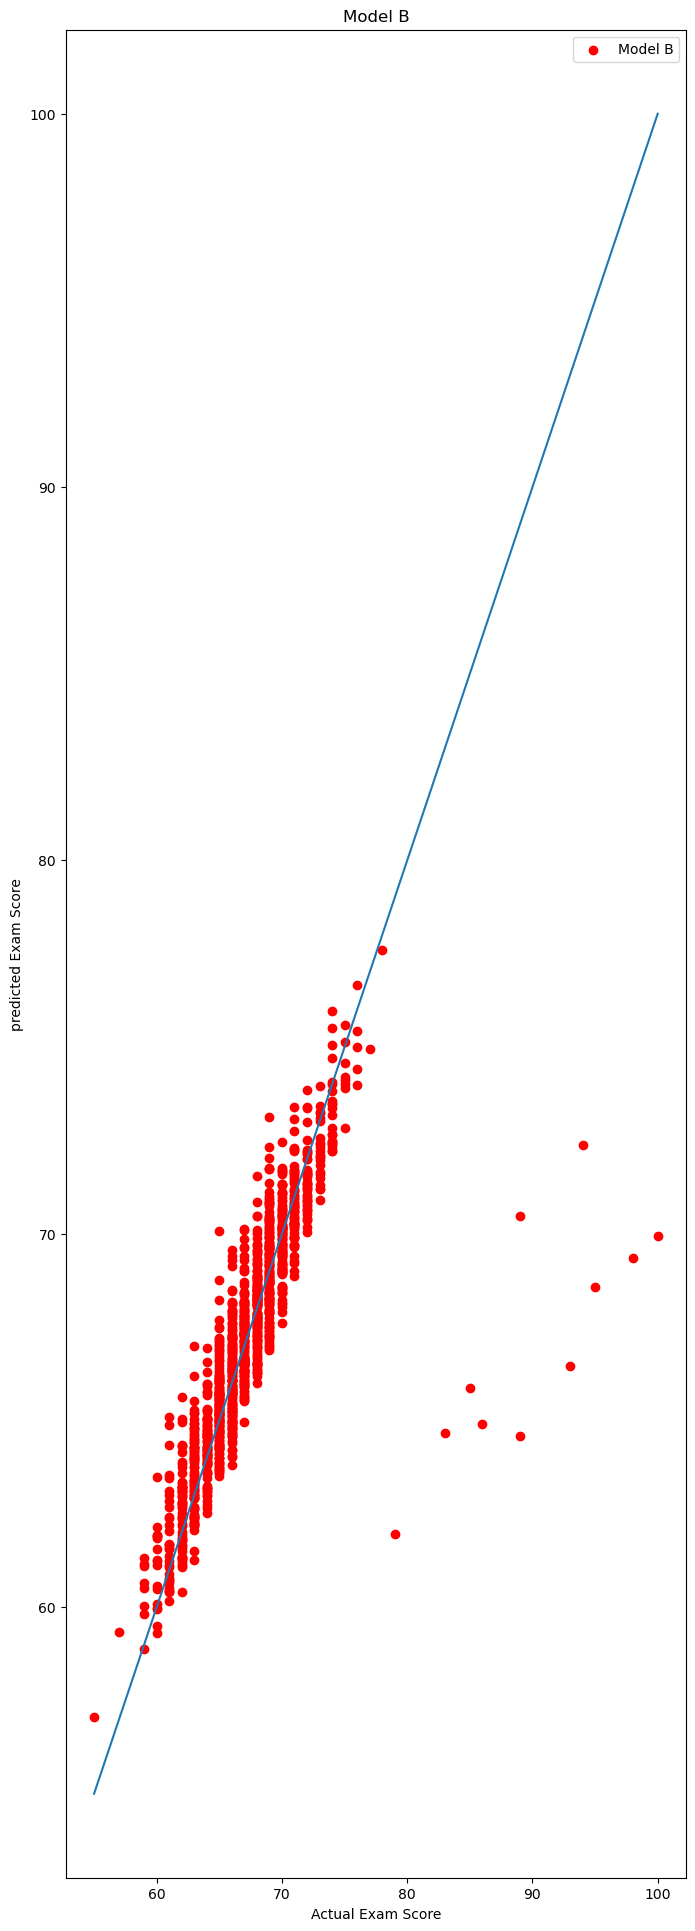

In [33]:
# 3.1: Visualisation of A

plt.figure(figsize=(8,24))
plt.scatter(y_test_20, predicted_a, color="black", label='Model A')
plt.plot([y_test_20.min(), y_test_20.max()], (y_test_20.min(), y_test_20.max()))
plt.xlabel('Actual Exam Score')
plt.ylabel('predicted Exam Score')
plt.title('Model A')
plt.legend()
plt.show()

#Visualisation of B

plt.figure(figsize=(8,24))
plt.scatter(y_test_20, predicted_b, color="Red", label='Model B')
plt.plot([y_test_20.min(), y_test_20.max()], (y_test_20.min(), y_test_20.max()))
plt.xlabel('Actual Exam Score')
plt.ylabel('predicted Exam Score')
plt.title('Model B')
plt.legend()
plt.show()


In [34]:
# 3.2: Comparison of graphs

# When analysing Models A and B, it may be observed that Model A is less accurate than Model B as it has both a higher MSE and RMSE. This indicates
# that Model B is more accurate at predicting performance which is reflected in the graphs below as Model B's results
#follow the trend of the line of best fit.

## Part 4: Logistic Regression

### Within this section, we will build a logistic regression classification model through the following steps:
-  4.1: Splitting the dataset
-  4.2: Building the logistic regression model
-  4.3: Plotting the features

In [37]:
# 4.1: Splitting the dataset
y=SPF['Exam_Score']
X=SPF.drop(columns=['Exam_Score'])

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=47608811)

In [38]:
# 4.2: Create and train the linear regression model

# Required Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Prepare the data
y = SPF['Exam_Score']  # Multi-class target variable
X = SPF.drop(columns=['Exam_Score'])  # Features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47608811)

# Create and train the model
model = RandomForestClassifier(random_state=47608811)  # You can also use LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

# Make predictions
Test_predictions = model.predict(X_test)
Train_predictions = model.predict(X_train)

# Evaluate the model
Test_accuracy = accuracy_score(y_test, Test_predictions)
Test_f1 = f1_score(y_test, Test_predictions, average='weighted')

Train_accuracy = accuracy_score(y_train, Train_predictions)
Train_f1 = f1_score(y_train, Train_predictions, average='weighted')

# Print results
print("Test Accuracy:", Test_accuracy)
print("--------------------------------------")
print("Test F1:", Test_f1)
print("--------------------------------------")
print("Train Accuracy:", Train_accuracy)
print("--------------------------------------")
print("Train F1:", Train_f1)


Test Accuracy: 0.26332288401253917
--------------------------------------
Test F1: 0.25740296072796764
--------------------------------------
Train Accuracy: 1.0
--------------------------------------
Train F1: 1.0


In [39]:
#RFE

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression model configured for multi-class classification
model = LogisticRegression(multi_class='multinomial', max_iter=25)

# Lists to store performance metrics
accuracy_scores = []
f1_scores = []
num_features = []

# Iterate through different numbers of features to retain
for n in range(1, X_train.shape[1] + 1):  # n ranges from 1 to the total number of features
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = rfe.predict(X_test)

    # Calculate accuracy and F1-Score
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions, average='weighted')  # Use weighted F1 score for multi-class

    # Store the results
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    num_features.append(n)




C:\Users\namah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\namah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

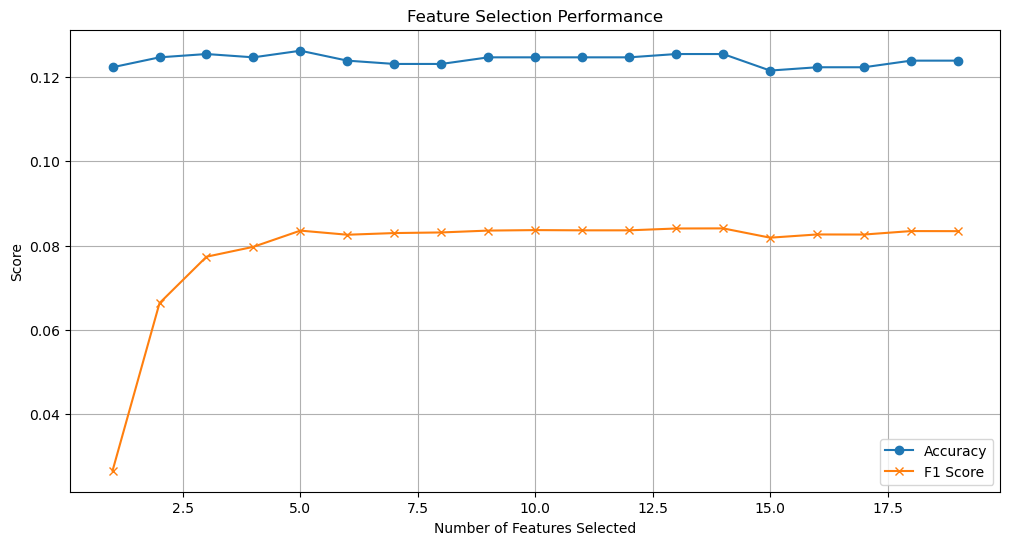

In [40]:
# 4.3:  Plotting the Results
plt.figure(figsize=(12, 6))
plt.plot(num_features, accuracy_scores, label='Accuracy', marker='o')
plt.plot(num_features, f1_scores, label='F1 Score', marker='x')
plt.xlabel('Number of Features Selected')
plt.ylabel('Score')
plt.title('Feature Selection Performance')
plt.legend()
plt.grid()
plt.show()

## Part 5: KNN classification model

#### Within this subsection, a KNN classification model will be built, allowing us to understand the accuracy of our predictions.
-  5.1: Select Features
-  5.2: Build the KNN classifier and identify if the model is overfitting
-  5.3: PLot the model


In [42]:
 # 5.1-5.2: Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming 'X' are your selected features and 'y' is the target variable (Category)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a 1-NN classifier
knn_1nn = KNeighborsClassifier(n_neighbors=1)
knn_1nn.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = knn_1nn.predict(X_train)
y_test_pred = knn_1nn.predict(X_test)

# Calculate accuracy and F1-score for training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Output the metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print("-------------------------------------------")
print(f"Training F1-Score: {train_f1:.4f}")
print("-------------------------------------------")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("-------------------------------------------")
print(f"Testing F1-Score: {test_f1:.4f}")
print("-------------------------------------------")

# Compare and justify overfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting as the training accuracy is higher than testing accuracy.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0000
-------------------------------------------
Training F1-Score: 1.0000
-------------------------------------------
Testing Accuracy: 0.1654
-------------------------------------------
Testing F1-Score: 0.1647
-------------------------------------------
The model may be overfitting as the training accuracy is higher than testing accuracy.


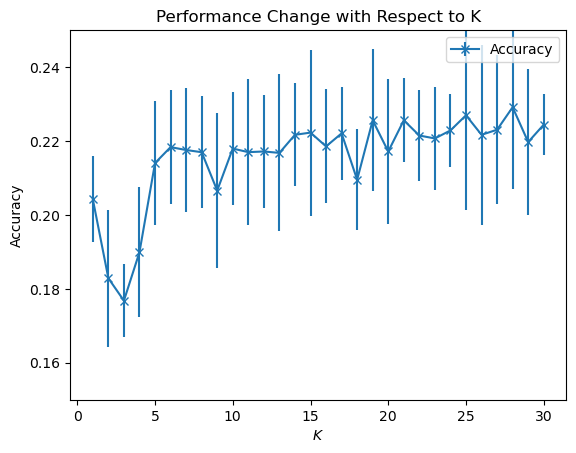

NameError: name 'grid_search' is not defined

In [43]:
#5.3: Plot the results
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#K fold CV
cv_scores = []
cv_scores_std = []
k_range = range(1, 31)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('Performance Change with Respect to K')
plt.legend(loc='best')
plt.ylim(0.15,0.25)
plt.show()


# Evaluate the best model on the testing data
best_knn = grid_search.best_estimator_
y_test_pred_best = best_knn.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
test_f1_best = f1_score(y_test, y_test_pred_best, average='weighted')

print(f"Best Model Testing Accuracy: {test_accuracy_best:.4f}")
print("-----------------------------------------------------------")
print(f"Best Model Testing F1-Score: {test_f1_best:.4f}")

##  Part 6:Analysis on Exam Marks

In [70]:
# After using many predictive modeling tools to analyse how certain factors affect exam scores, evaluations may be made. 
# Notably, attendance and hours studied exhibit the strongest positive correlations with exam scores, with correlation coefficients of 0.58 and 0.44,
#respectively. This indicates that consistent attendance and effective study habits are crucial for academic success.
#Surprisingly, factors such as teacher quality and family income show weak or negative correlations,
#suggesting that they may not directly determine exam outcomes within this dataset.
#This could be due to the complex nature of learning environments or external factors not captured here. 
#Additionally, previous scores, while positively correlated (0.17), are not as significant as attendance or study hours, 
#highlighting that consistent effort throughout the course is more impactful than prior academic history.